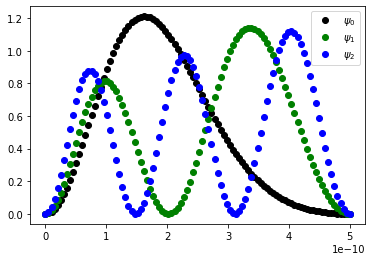

In [59]:
import numpy as np
import matplotlib.pyplot as plt

L = 5 * 10 **(-10) #m
a = 10 #eV
M = 9.1094*10**(-31) #kg
q = 1.6022 * 10 **(-19) #C
h = 6.582*10**(-16) # eV*s , constante de plank

def matriz_H(N):
    
    def H(m,n):
        # V(x) = ax/L
        if m == n:
            integral = L/2
            integral2 = L**2/4
        elif not (m%2 == n%2):
            integral = 0.0
            integral2 = -(2*L/np.pi)**2 * m*n/((m**2 - n**2)**2)
        else :
            integral = 0.0
            integral2 = 0.0
            """
            m != n ---> integral = 0
            ambos par ou ambos ímpar --> integral2 = 0  
            """
        return 2/L * ( (h*n*np.pi/L)**2/(2*M)*integral*q + a/L*integral2 ) # multiplicar parcela da esquerda pela carrga do eletrão para ter unidades corretas

    A = np.empty([N,N],float) 
    for k in range(N):
        for l in range(N):
            A[k,l] = H(k+1 , l+1)
    return A

E, psi = np.linalg.eigh( matriz_H(10) )  # E - autovalor , psi - autovetor 
#print(E)    # E[0] deve ser aproximadamente 5.84 eV

E100, psi100 = np.linalg.eigh( matriz_H(100) )
#print(E100)

# Quanto maior for a matriz H maior será a precisão do cálculo 
# Uma vez que a matriz deveria ser infinita

def psi_n(n,x): # para uma matriz 100x100
    psi0 = 0
    for m in range(100):
        psi0 += psi100[m,n] * np.sin(np.pi * (m+1) * x / L)
    return psi0

x = np.linspace(0,L,100)
y0 = np.zeros(x.shape)
y1 = np.zeros(x.shape)
y2 = np.zeros(x.shape)

for i in range(100): 
    y0[i] = psi_n(0,x[i]) **2
    y1[i] = psi_n(1,x[i]) **2
    y2[i] = psi_n(2,x[i]) **2
    
plt.plot(x, y0, "ko")
plt.plot(x, y1, "go")
plt.plot(x, y2, "bo")
plt.legend(("$\psi_0$","$\psi_1$","$\psi_2$"))
plt.show()